### Problem Statement

##### Enable the telemarketing team to prioritize targeting for the term loan marketing program by adopting a data-driven approach for improved efficiency and conversion rates.

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [57]:
df=pd.read_csv("bank_term_loan.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [58]:
#summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [59]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

How many term depositers are there in the data?

In [60]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In the absence of ML, what is the success rate?

In [61]:
df['target'] = np.where(df['y'].isin(['yes']),1,0)
df['target'].mean().round(2)

0.11

Without any ML intervention, the telemarketing team currently achieves an 11% success rate. This project aims to evaluate how much improvement an ML model can bring in optimizing customer targeting and increasing conversion rates.

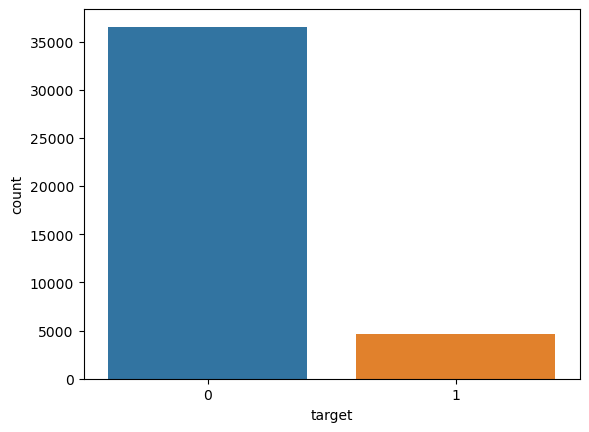

In [62]:
import seaborn as sns
sns.countplot(x='target', data=df)
plt.show()

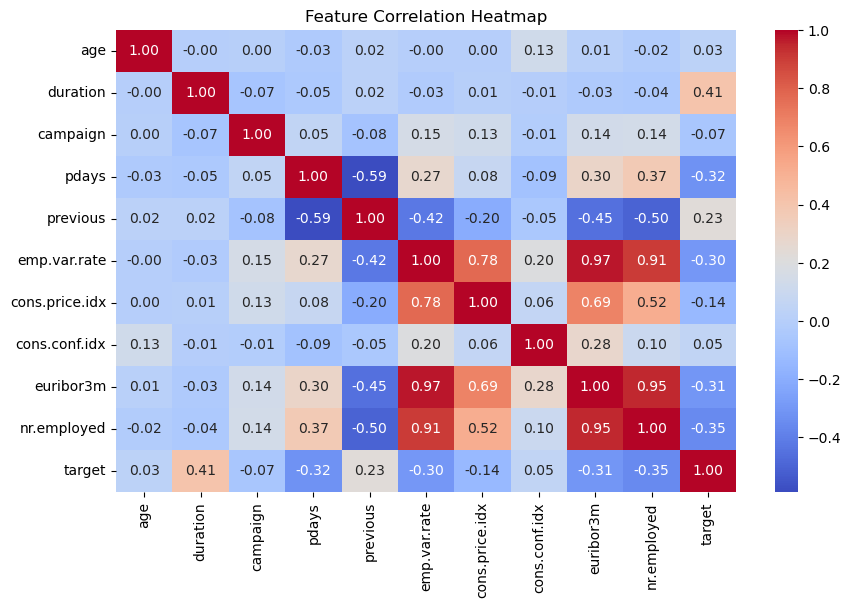

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [71]:
# # distribution of job types, marital status, and education
# for col in ['job', 'marital', 'education']:
#     plt.figure(figsize=(8,4))
#     sns.countplot(y=df[col], order=df[col].value_counts().index)
#     plt.title(f"Distribution of {col}")
#     plt.show()

In [70]:
# #Relationship between categorical features and target variable
# for col in ['job', 'marital', 'education']:
#     plt.figure(figsize=(8,4))
#     sns.barplot(x=df[col], y=df['y'].apply(lambda x: 1 if x=='yes' else 0))
#     plt.xticks(rotation=45)
#     plt.title(f"Proportion of 'yes' in {col}")
#     plt.show()


In [69]:
# # Continuous numeric columns from the dataset
# num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
#             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# # Plot histograms & boxplots for numeric columns
# for col in num_cols:
#     fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
#     sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
#     axes[0].set_title(f"Distribution of {col}")

#     sns.boxplot(x=df[col], ax=axes[1])
#     axes[1].set_title(f"Boxplot of {col}")

#     plt.show()
